In [1]:
import numpy as np
import autograd.numpy as np_ 
from autograd import grad
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Este projeto tem como objetivo implementar um modelo preditivo que usa o algoritmo de regressão linear com o fito de treinar um modelo que possa prever se determinada pessoa teve ou não acidente vascular cerebral (AVC) com base em suas características pessoais.

<p style = "font-size: 25px" >   O dataset utilizado foi obtido no Kaggle e pode ser encontrado clicando <a href = "https://www.kaggle.com/fedesoriano/stroke-prediction-dataset">aqui</a> <br><br>
O nosso dataset contém usuários por linha e as colunas representam os dados sobre esses indivíduos (no nosso caso, chamamos esses dados de features), são elas: <br>
<i style="color: gray" >age hypertension, heart_disease, stroke, gender_Female, gender_Male, gender_Other, ever_married_No, ever_married_Yes, work_type_Govt_job, work_type_Never_worked, work_type_Private,work_type_Self-employed, work_type_children, Residence_type_Rural, Residence_type_Urban, smoking_status_Unknown, smoking_status_formerly smoked, smoking_status_never smoked,	smoking_status_smokes.</i><br>
A  coluna target é o <i>stroke</i>, que indica se o indivíduo teve ou não AVC.<br><br>
A coluna target é a que queremos prever,nesse caso, a coluna stroke, que indica se o indivíduo teve ou não AVC.
Para treinar o nosso modelo, usamos o algoritmo de<i> regressão linear</i>, que é um algoritmo de aprendizado supervisionado, ou seja, ele aprende a partir de um conjunto de dados rotulados, ou seja, dados que já possuem a resposta correta.
Primeiro, utilizamos a função do pandas <i>get_dummies</i> , pois é necessário transformar todas as variáveis categóricas em variavéis binárias, pois assim, nosso modelo de regressão linear consegue trablhar em cima dessas variáveis.
Para o nosso modelo preditivo não ficar enviesado, trabalhamos com um dataset balanceado, ou seja, com a mesma quantidade de pessoas que tiveram AVC e que não tiveram AVC. Para isso, pegamos <i> 249 </i>pessoas que não tiveram AVC e juntamos com as <i> 249 </i> pessoas que tiveram AVC, totalizando 498 pessoas no nosso dataset.</p>

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
# pd.get_dummies(df) é usado para converter variáveis categóricas em variáveis dummy/indicadoras.
df_ = pd.get_dummies(df)
#Dois filtros são criados para separar as linhas em que o acidente vascular cerebral está presente (filtro_avc) 
#e onde o acidente vascular cerebral está ausente (filtro_ausencia).
filtro_ausencia = df_['stroke'] == 0
filtro_avc = df_['stroke'] == 1
#df_avc e df_ausencia são criados aplicando esses filtros ao dataframe original df_. df_ausencia é então fatiado
#para conter as primeiras 249 linhas para que mais pra frente não tenhamos problemas com a nossa hipótese nula (tiramos o viés).
df_avc = df_[filtro_avc]
df_ausencia = df_[filtro_ausencia]
df_ausencia = df_ausencia.iloc[0:249]
#pd.concat() é usado para combinar df_avc e df_ausencia em um único dataframe df_, onde as primeiras 249 
#linhas representam a ausência de acidente vascular cerebral e as linhas restantes representam a presença de acidente vascular cerebral.
df_ = pd.concat([df_ausencia, df_avc])
#Esse processo tem como objetivo criar um conjunto de dados equilibrado com representação
#igual de casos de acidente vascular cerebral e não-acidente vascular cerebral, o que é
#importante para treinar modelos de aprendizado de máquina que precisam prever o acidente vascular cerebral.


<p style ="font-size: 25px" >
No nosso dataset também possuia uma coluna chamada <i>id</i>, que não é uma feature, pois não tem relação com o nosso target, então, removemos essa coluna do nosso dataset.
Removemos, também, a coluna <i>bmi</i> e <i>avg_glucose_level</i>, pois essas colunas possuem muitos valores nulos, o que poderia prejudicar o nosso modelo preditivo.
</p>

In [3]:
# remove as linhas de id (pois não é uma feature),  bmi e avg_glucose_level (pois contém valores nulos)
df_ = df_.drop('bmi', axis=1)
df_ = df_.drop('id', axis = 1)
df_ = df_.drop('avg_glucose_level', axis= 1)




<p style = "font-size:25px" >Ainda estamos na fase de pre-processamento dos nossos dados
Seguindo adiante, agora, teremos que separar nossos dados em dois conjuntos, um conjunto de teste e um conjunto de treino. Isso é necessário, pois após treinar nosso modelo, precisamos testá-lo, pra verificar como ele se sai em um ambiente não supervisionado. Mas como nossos dados são limitados, temos que dividí-los, pois não temos outro dataset com dados de teste. A divisão foi feita de modo a ter 50% dos dados originais no dataset de teste e 50% no de treino<br><br>
Para a divisão, utilizaremos uma função do skcit-learn que consegue nos dar dois datasets, um de treino e um de teste, com seus respectivos targets</p>

In [198]:
#dividimos o conjunto de dados em duas partes, um conjunto de treinamento e um conjunto de teste, para que 
#um modelo de aprendizado de máquina possa ser treinado e testado em dados independentes.

# atribui a variável y à coluna 'stroke' do dataframe df_, que contém a variável de destino que o modelo deve prever.
y = df_['stroke']
# atribui a variável X a todas as colunas do dataframe df_, exceto a coluna 'stroke', que contém as variáveis de entrada que o modelo deve usar para fazer previsões.
X = df_.drop('stroke', axis = 1)

#Usamos a função train_test_split da biblioteca Scikit-learn para dividir X e y em conjuntos de treinamento e teste. O argumento train_size=0.5 indica que o conjunto de treinamento deve ter 50% dos dados.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
y_train.replace(0,-1,inplace=True)
y_test.replace(0,-1,inplace=True)




In [32]:
X_train

,age,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
27,58.0,0,0,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False
182,32.0,0,0,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True
325,76.0,0,0,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
285,32.0,0,0,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False
271,49.0,0,0,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,63.0,0,1,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False
288,17.0,0,0,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False
244,57.0,0,0,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False
225,57.0,0,1,True,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False


<p style = "font-size:25px" >Com a fase de preprocessamento concluída, poderemos seguir adiante e iniciar a fase de modelagem. Como já dito antes, utilizaremos um modelo de regressão linear.<br>
Para fazer isso, é necessário criar uma função de perda, que terá o objetivo de minimizar o erro do nosso modelo. Para isso, utilizaremos a função <i>mean_squared_error</i> do sklearn, que calcula o erro quadrático médio, ou seja, a média do quadrado da diferença entre o valor real e o valor previsto pelo modelo. <br>
No nosso caso, vamos ter um vetor de pesos (w), que são os pesos que multiplicam as features, e um vetor de bias (b), que é um valor que é adicionado ao resultado da multiplicação dos pesos com as features. <br> O nosso objetivo é encontrar os valores de w e b que minimizam a função de perda. Isso é coerente com o que queremos, pois se conseguirmos um vetor w e um valor b de tal forma que a multiplicação de w com as features e a adição de b ao resultado dessa multiplicação seja quase igual ao valor real, então, teremos um modelo que consegue prever se uma pessoa teve ou não AVC. A ideia central do algoritmo se baseia nessa lógica <br>
Para fazer isso, utilizaremos o algoritmo de descida do gradiente, que é um algoritmo de otimização que visa encontrar o mínimo de uma função em relação aos parâmetros utilizados (w e b), ou seja, o ponto onde a função tem o menor valor, que é justamente o que queremos. <br>
Para isso, setamos um vetor w com valores aleatórios em seus componentes e, também, setamos o valor aleatório para b. 
Na descida pelo gradiente, precisamos de um valor de aprendizado, que é um valor que indica o quão rápido o algoritmo vai se mover em direção ao mínimo da função. Esse valor é definido por nós, e, no nosso caso, setamos o valor de aprendizado como 0.0001. <br>
Rodamos, repetidamente, o algoritmo de descida do gradiente, atualizando os valores de w e b, até que o valor da função de perda seja o menor possível. <br><br>
No nosso caso, a gente percebeu que o valor da função de perda não diminuia mais após 50000 iterações, então, setamos o número de iterações como 50000. <br><br>
<br>

</p>

In [200]:
# Define a função de perda com parâmetros que incluem os pontos de treinamento, os valores alvo,
# bem como os pesos e o bias (w e b) que precisam ser ajustados para minimizar a perda.
def loss(parametros):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean((est - val)**2)
    return mse

# Calcula o gradiente da função de perda para atualizar os pesos e bias durante o treinamento.
g = grad(loss)

# Transforma os dados de treinamento em matrizes numpy para serem usados pelo modelo.
pontos = X_train.to_numpy().T.astype('float64')
alvos = y_train.to_numpy().astype('float64')



# Inicializa os pesos aleatoriamente com uma matriz 19x1, já que temos 19 features e 1 saída.
w = np.random.randn(19, 1)

# Inicializa o bias com um valor de 0.4.
b = 0.4

# Define a taxa de aprendizado como 0.0001.
alpha = 0.0001



# Realiza o treinamento por 100000 iterações.
for n in range(50000):
    # Calcula o gradiente da perda para os pesos e bias atuais.
    
    grad_ = g((w, b, pontos, alvos))
    
    # Atualiza os pesos e bias usando o gradiente e o valor do passo definido.
    # isso é feito para conseguirmos cada vez mais os valores de w e b que minimizam a função de perda para 
    # poder prever o acidente vascular cerebral com maior precisão.
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]

print(w)
print(b)





In [17]:
# Valor de w obtido:
# [[ 0.02247753]
#  [ 0.29734379]
#  [ 0.630744  ]
#  [-0.19814538]
#  [-0.19629499]
#  [ 1.68716551]
#  [-1.11056566]
#  [-1.08215393]
#  [ 0.16253222]
#  [-0.18733694]
#  [ 0.52697141]
#  [ 0.28042407]
#  [ 0.57729196]
#  [-0.7200512 ]
#  [-0.62455492]
#  [ 0.31197738]
#  [ 0.4286117 ]
#  [ 0.22338347]
#  [ 0.04678035]]

#Valor de B obtido: -0.14772863729933447

<p style ="font-size:25px"> Com o modelo treinado, é hora de usar o conjunto de teste, para verificar o quão bom nosso modelo está. Obtivemos uma acurácia boa, em comparação com o modelo de hipótese nula, que acertou apenas 50%. Nosso modelo acertou mais de 70%, o que é razoável pra um modelo treinado com regressão linear </p>

In [18]:
def accuracy(y_test, y_est):
    # Calcula a acurácia do modelo, que é a proporção de valores alvo que foram previstos corretamente.
    return np.mean(np.sign(y_test)==np.sign(y_est))
# Transforma os dados de teste em matrizes numpy para serem usados pelo modelo.
pontos = X_test.to_numpy().T.astype('float64')
alvos = y_test.to_numpy().astype('float64')
# Calcula as previsões do modelo para os dados de teste.
est = w.T @ pontos+ b

print(f"Acurácia do nosso modelo treinado com regressão linear: {accuracy(est, alvos)*100:.4f}%")

Acurácia do nosso modelo treinado com regressão linear: 70.2811%


In [19]:
# Calcula a acurácia do modelo de hipótese nula, que é a proporção de valores alvo que foram previstos corretamente.

print(f"Acurácia do modelo de hipótese nula: {249/(249+249):.2f}")

Acurácia do modelo de hipótese nula: 0.50


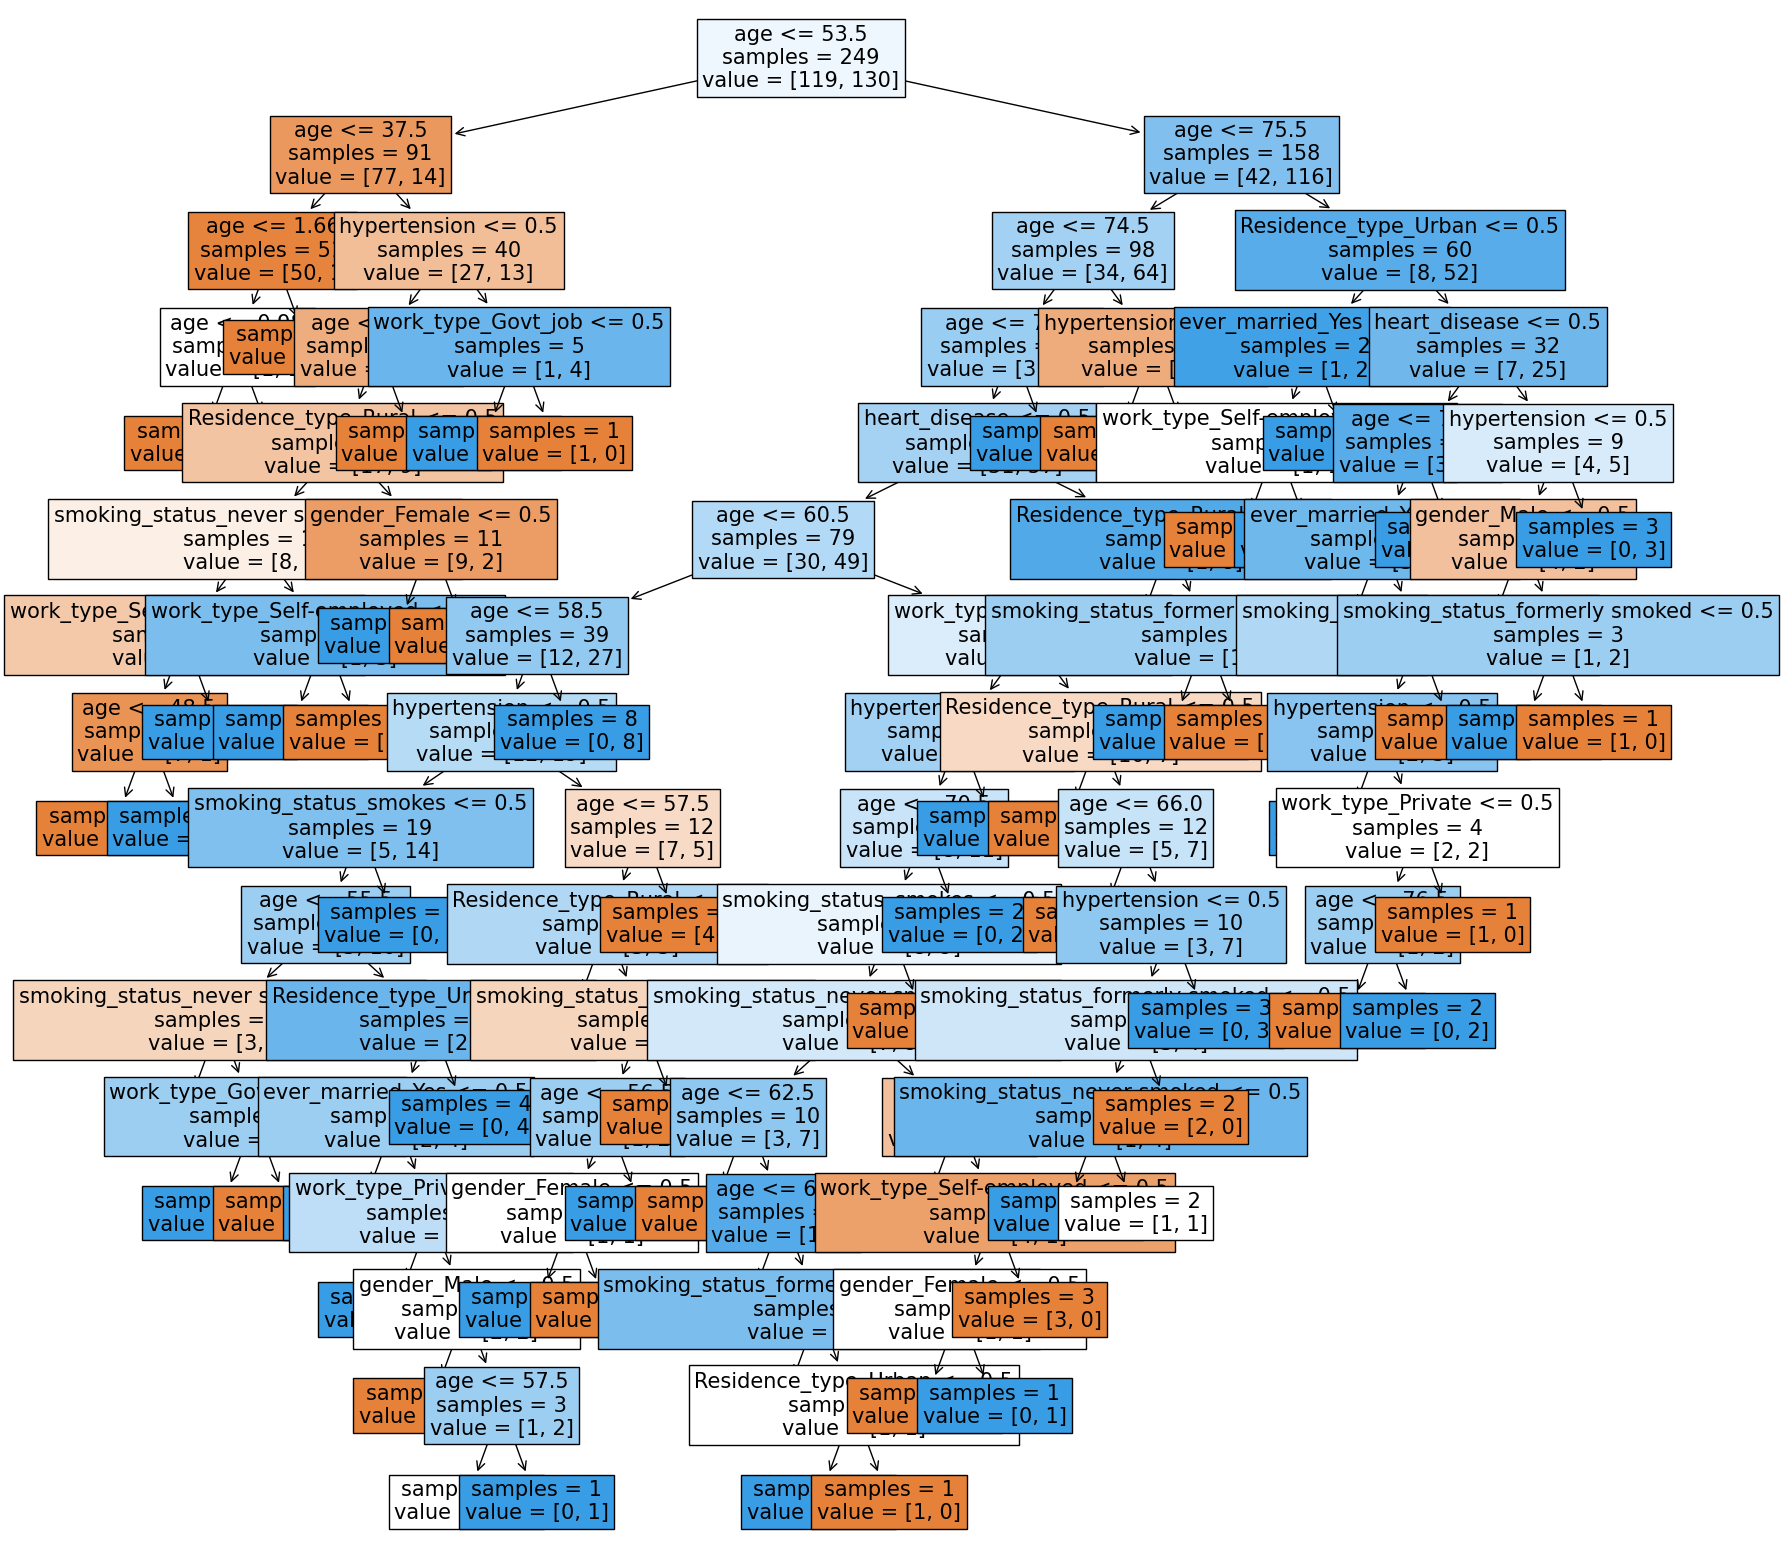

In [20]:
from sklearn.tree import DecisionTreeClassifier
# Cria um modelo de árvore de decisão 
tree = DecisionTreeClassifier(criterion='entropy')
# Treina o modelo com os dados de treinamento
tree.fit(X_test, y_test)
# Calcula as previsões do modelo para os dados de teste.
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
a = plot_tree(tree, feature_names=X_test.columns, fontsize=15, node_ids=False, impurity=False, filled=True)